# Orbital Mechanics

Nathan Weil


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [3]:
# Sets up units

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
degree = UNITS.degree
radian = UNITS.radian
year = UNITS.year

<Unit('year')>

In [4]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m

init = State(x = r_0,
             y = 0,
             vx = 0 * m / s,
             vy = -30330 * m / s,
             )

,values
x,147000000000.0 meter
y,0
vx,0.0 meter / second
vy,-30330.0 meter / second


In [6]:
# Radii of Earth and Sun

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

# Making a system object

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end= (1 * year) * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,1.0 second * year


In [7]:
# Computes gravitational force vector

def universal_gravitation(state, system):

    x, y, xv, yv = state
    unpack(system)
    
    r = Vector(x, y)
    unit = r.hat()
    
    force = G * m1 * m2 / r.mag**2
    
    return unit * force

In [8]:
universal_gravitation(init, system)

<Quantity([3.6686486e+22 0.0000000e+00], 'newton')>

In [9]:
# Slope function that outputs 

def slope_func(state, t, system):

    x, y, vx, vy = state
    unpack(system)  
    
    v = Vector(vx, vy)

    a = -universal_gravitation(state, system) / m2
    
    return vx, vy, a.x, a.y

In [12]:
# Tests slope functions with initial conditions

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [13]:
# Event function that stops the simulation 
# Before collision of Earth and Sun

def event_func(state, t, system):
    x, y, vx, vy = state
    v = Vector(x, y)
    return v.mag - system.r_final

In [14]:
# Tests event function with initial conditions

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [15]:
# Runs Simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[]]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [19]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts, max_step = 100000)

In [20]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [21]:
# Scaling the distance to million km

x = results.x / 1e9;
y = results.y / 1e9;

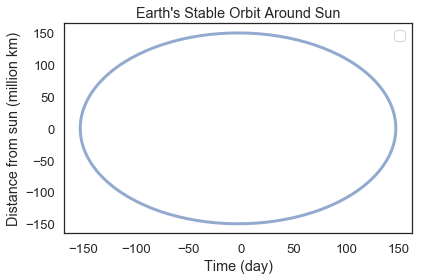

In [23]:
# And plotting

plot(x, y)

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)',
         title="Earth's Stable Orbit Around Sun")